In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from matplotlib import ticker
import pandas as pd
from scipy.optimize import curve_fit


with open('/Users/DaweiFu/fdw/Co60_数据文件.TXT','r') as f1: N1 = f1.read().splitlines()
with open('/Users/DaweiFu/fdw/Cs137_数据文件.TXT','r') as f2: N2 = f2.read().splitlines()

N1 = [ int(x)/1206 for x in N1 ]
N2 = [ int(x)/1400 for x in N2 ]


lnN1 = np.log(N1)
lnN2 = np.log(N2)

x=[a for a in range(1, 513)]
#x=[n[i]*3/512 for i in range(512)]
print(N1[0])

0.0


/var/folders/cf/rp73zkws3232x_89lllkwqt00000gm/T/ipykernel_10827/1869126598.py:17: RuntimeWarning: divide by zero encountered in log
  lnN1 = np.log(N1)
/var/folders/cf/rp73zkws3232x_89lllkwqt00000gm/T/ipykernel_10827/1869126598.py:18: RuntimeWarning: divide by zero encountered in log
  lnN2 = np.log(N2)


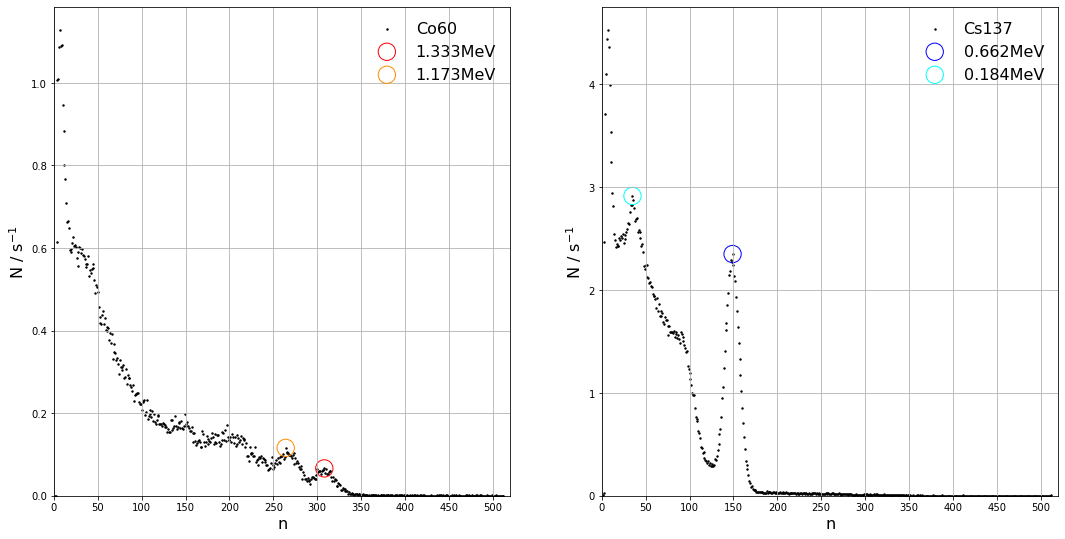

In [96]:
#fig=plt.figure(figsize=(12,9))
fig, axes=plt.subplots(1, 2, figsize=(18, 9), sharex=False, sharey=False)

fullline=np.linspace(20, 500)

#axes[0][0].scatter(x, lnN1, label='0.05mm Al', marker='o', color='black', s=2)
#axes[0][1].scatter(x, lnN2, label='0.10mm Al', marker='o', color='black', s=2)

axes[0].scatter(x, N1, label='Co60', marker='o', color='black', s=2)
axes[1].scatter(x, N2, label='Cs137', marker='o', color='black', s=2)
axes[0].scatter(308, 80/1206, label='1.333MeV', color='none', marker='o', edgecolors='red', s=300)
axes[0].scatter(264, 140/1206, label='1.173MeV', color='none', marker='o', edgecolors='darkorange', s=300)
axes[1].scatter(149, 3289/1400, label='0.662MeV', color='none', marker='o', edgecolors='blue', s=300)
axes[1].scatter(35, 4079/1400, label='0.184MeV', color='none', marker='o', edgecolors='cyan', s=300)
#axes[0].plot(x, N1, color = 'red', linestyle='dashed', label='Co60', linewidth=2)
#axes[1].plot(x, N2, color = 'darkorange', linestyle='dashed', label='Cs137', linewidth=2)

#ax1.plot(x, N1, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=1, label=r'$\rm Data$')

x_major_locator=MultipleLocator(50)
y_major_locator=MultipleLocator(0.5)
for i in range(0,2):

        axes[i].legend(loc=1, frameon=False, fontsize=16)
        axes[i].set_ylabel(r'$\rm N\ /\ s^{-1}$', fontsize=16, color="black") 
        axes[i].set_xlabel(r'$\rm n$', fontsize=16, color="black") 
        axes[i].grid()
        axes[i].set_ylim(0)
        axes[i].set_xlim(0,520)
        axes[i].xaxis.set_major_locator(x_major_locator)
        #axes[i].yaxis.set_major_locator(y1_major_locator)
        #axes[i][j].tick_params(axis='y', colors='black') 


##ax1.yaxis.label.set_color('red') 
#plt.title(r"$\rm Curve\ of\ Standing\ wave\ I(x)$", fontsize=18)
##plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
plt.grid(True)
##plt.legend(loc='best', frameon=False)
plt.xlim(0,520)
##plt.ylim(-5,1000)
##plt.axis([30, 400, 100, 400])
##plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
##plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
ax=plt.gca()
#ax.spines['left'].set_color('blue')
#ax.spines['right'].set_color('darkgreen')

plt.savefig('phyex3_fig1.pdf')
plt.show()

R2=0.999491
[0.00425227 0.03432047]
[6.78807831e-05 1.47156551e-02]
0.004252272626491064 0.034320473593188794


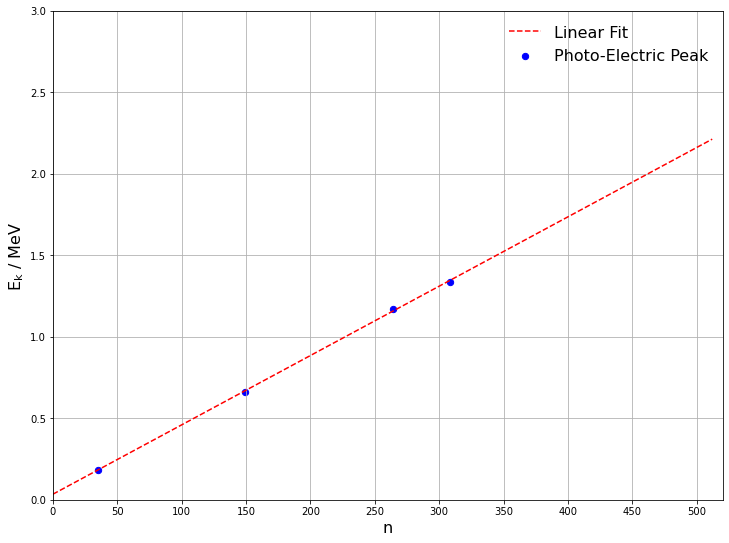

In [101]:
n=[308,264,149,35]
E=[1.333,1.173,0.662,0.184]


p, cov=np.polyfit(n, E, 1, cov=True)
mymodel = np.poly1d(p)
myline = np.linspace(0, 512)
a1 = mymodel.coefficients[0]
a0 = mymodel.coefficients[1]

r2=r2_score(E, mymodel(n))
print("R2=%.6f"%r2)
# print("the values are %d %7.5f %s" % (x, y, z))
print(mymodel.coefficients)

print(np.sqrt(np.diag(cov)))
sigma1,sigma0=np.sqrt(np.diag(cov))

plt.figure(figsize=(12,9))
x_major_locator=MultipleLocator(50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
#ax.text(50, 2.0,r"$\rm E/MeV=(%.5f\pm%.5f)*n+(%.5f\pm%.5f)$"%(a1,sigma1,a0,sigma0), fontsize=20,color="red")
#ax.text(50, 1.8,r"$R^2=%.4f$"%(r2), fontsize=20,color="red")
ax.set_ylabel(r'$\rm E_k\ /\ MeV$', fontsize=16, color="black") 
ax.set_xlabel(r'$\rm n$', fontsize=16, color="black") 
plt.grid(True)
plt.xlim(0, 520)
plt.ylim(0,3)
plt.scatter(n, E, label='Photo-Electric Peak', marker='o', color='blue', s=40)
plt.plot(myline, mymodel(myline), color = 'red', linestyle='dashed', label='Linear Fit')
plt.legend(loc=0, frameon=False, fontsize=16)
print(a1,a0)
plt.savefig('phyex3_fig2.pdf')